## **Exploratory Data Analysis on Haberman Dataset**


* We have haberman dataset which contains cases of operations conducted on cancer patients from year 1958 to 1970
* The dataset contains four columns
  1.   Age : Age of the patient
  2.   Year : Year of operation
  3.   Nodes : No of positive auxillary nodes
  4.   status : Survival status of patient after operation





# **Objective**
* Identify if patient survives given 3 features age, year, nodes 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the file
df = pd.read_csv("haberman.csv")

In [3]:
# checking no of columns and rows in dataset
print(df.shape)

(306, 4)


Dataset contains 4 columns and 306 rows

In [4]:
# printing number of columns in dataset
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
# data types
df.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

All the columns of dataset are integer. Status column define class and hence it should be categorical

In [6]:
# high level statistical overview
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000




* Age is varying from 30 to 83
* Year is varying frm 58 to 69
* Nodes are varying from 0 to 52
* 75 percentile lies at 4 and max is 53 means node column has outliers


In [7]:
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

There is imbalance between two classes 1 and 2. 1 has more rows than 2 that means more patient survied compared to dead

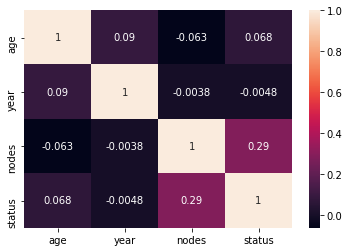

In [8]:
# Correlation plot
df.corr()
g = sns.heatmap(df.corr(), annot = True)


1.There is some linear correlation between survival status and nodes. 

2.Hence Node column is important feature in determining whether person will survive or not



In [9]:
# Converting status column into categorical
df['status'] = df['status'].map({1:'alive', 2:'dead'})
print(df.head(10))

   age  year  nodes status
0   30    64      1  alive
1   30    62      3  alive
2   30    65      0  alive
3   31    59      2  alive
4   31    65      4  alive
5   33    58     10  alive
6   33    60      0  alive
7   34    59      0   dead
8   34    66      9   dead
9   34    58     30  alive


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB



* Dataset contains 3 integer and 1 categorical columns
* Columns age, year and nodes are integers while status column is object
* Memory usage of this dataset is around 9.7KB



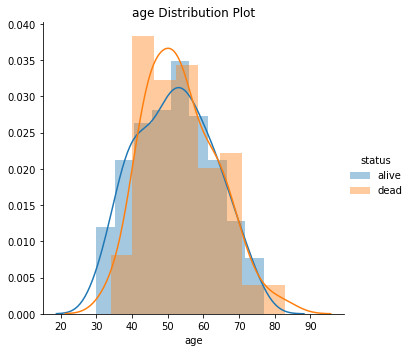

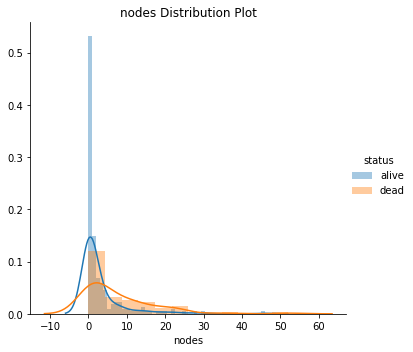

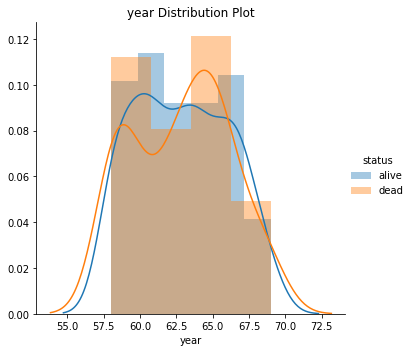

In [11]:
# plotting Nodes vs Age
columns = ["age","nodes","year"]
for i in range(len(columns)):
  sns.FacetGrid(df, hue="status", size=5).set(title=(columns[i]+' Distribution Plot')) \
    .map(sns.distplot, columns[i]) \
    .set_axis_labels(columns[i])\
    .add_legend();
  plt.show();

Age vs Status Insights
* Patients with age between 30-35 are more likely to survive followed by patients between age 35-40
* Patients between age 41 to 70 have less chances of survival

Nodes vs Status Insights
* Patients with < 2 nodes are more likely to survive
* There are very less than above 25 nodes
* Some patients with nodes between 10 to 25 survived

Year vs Status Insights
* The chart is highly overlapping hence less scope for data analysis of survival status
* The patients who got operated between year 63 to 66 have less chance of surival. This is something which we can derive by using univariate analysis. We need to see multivariate analysis to look into other columns. For example what if patients who got operated between 63 to 66 have more nodes?






In [12]:
df_alive = df.loc[df["status"] == "alive"]
df_dead = df.loc[df["status"] == "dead"]

In [13]:
# Let's check basic statistical measures mean and median for classes
# Calculating mean
#Mean
print("\nMean alive:")
print("nodes",round(np.mean(df_alive["nodes"]),2))
print("age",round(np.mean(df_alive["age"]),2))
print("year",round(np.mean(df_alive["year"]),2))

#Mean
print("\nMean dead:")
print("nodes",round(np.mean(df_dead["nodes"]),2))
print("age",round(np.mean(df_dead["age"]),2))
print("year",round(np.mean(df_dead["year"]),2))


#Median
print("\nMedians alive:")
print("nodes",np.median(df_alive["nodes"]))
print("age",np.median(df_alive["age"]))
print("year",np.median(df_alive["year"]))

#Median
print("\nMedians dead:")
print("nodes",np.median(df_dead["nodes"]))
print("age",np.median(df_dead["age"]))
print("year",np.median(df_dead["year"]))



Mean alive:
nodes 2.79
age 52.02
year 62.86

Mean dead:
nodes 7.46
age 53.68
year 62.83

Medians alive:
nodes 0.0
age 52.0
year 63.0

Medians dead:
nodes 4.0
age 53.0
year 63.0


* Mean median for age year does not vary much between alive or dead
* Mean median for nodes has significant difference
* It tells people with less nodes are more likely to surive
* As mean >>> median for nodes,this means there are people with higher nodes(Outliers) who have survided the cancer

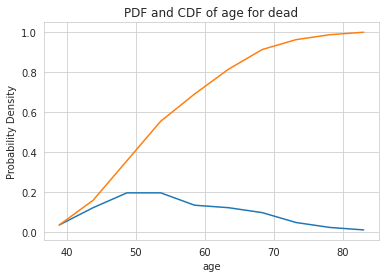

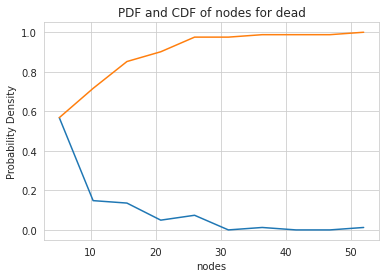

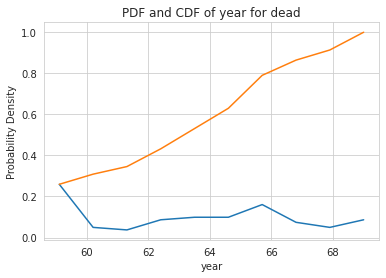

In [31]:
# plotting pdf and cdf for classes
# pdf and cdf are important for knowing the concentration of data at particular instance
columns = ["age","nodes","year"]
for i in range(len(columns)):
    
  counts, bin_edges = np.histogram(df_dead[columns[i]], 
                                  density = True)
  pdf = counts/(sum(counts))
  #print(pdf);
  #print(bin_edges);
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf);
  plt.plot(bin_edges[1:], cdf)
  plt.xlabel(columns[i])
  plt.ylabel("Probability Density")
  plt.title("PDF and CDF of " + columns[i] + " for dead")
  plt.show();


* We get similar insights as in histrograms
* There is high data concentration at node = 0
* Highest number of patients died between age 48 to 54
* Patients who got operated between year 65 to 67 are less likely to survive



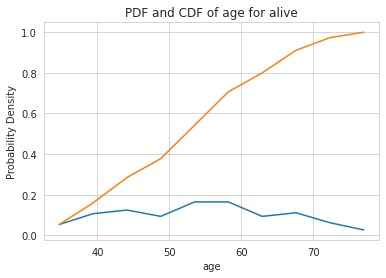

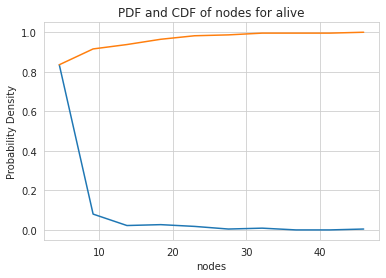

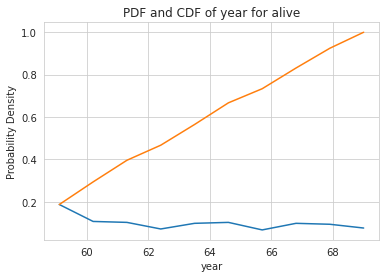

In [33]:
columns = ["age","nodes","year"]
for i in range(len(columns)):
    
  counts, bin_edges = np.histogram(df_alive[columns[i]], 
                                  density = True)
  pdf = counts/(sum(counts))
  #print(pdf);
  #print(bin_edges);
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf);
  plt.plot(bin_edges[1:], cdf);
  plt.xlabel(columns[i])
  plt.ylabel("Probability Density")
  plt.title("PDF and CDF of " + columns[i] + " for alive")
  plt.show();

 



*   Minimum nodes suggest higher chances of survival
*   Patients between age 54 to 58 have higher chances of survival



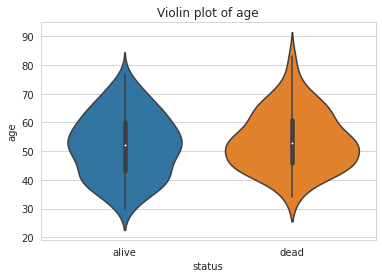

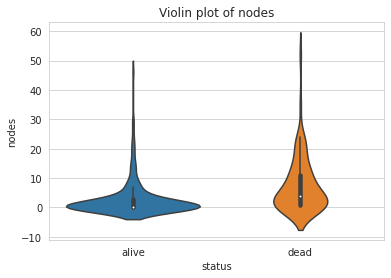

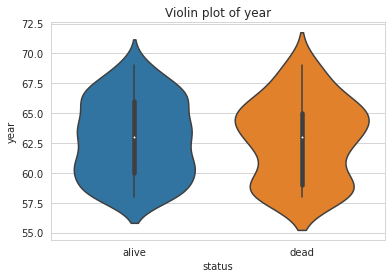

In [36]:
#violins are combination of pdf and box plot
columns = ["age","nodes","year"]
for i in range(len(columns)):
  sns.violinplot(x="status", y=columns[i], data=df, size=8).set(title=("Violin plot of "+columns[i]))
  plt.show()



*   Age and year shows nearly same distribution
*   People with less no of nodes are more likely to surive



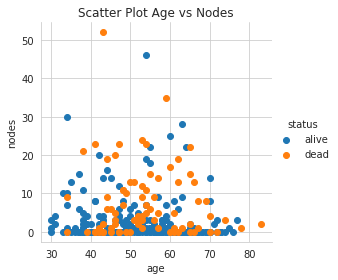

In [38]:
# Bivariate analysis
# We will plot age vs nodes, age vs year and year vs nodes and color it by status
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4).set(title=("Scatter Plot Age vs Nodes")) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();




* Patients between age 35 to 38 and 51 t 60 survided in absence of nodes
* Patients between age 50 to 70 with nodes more than 10 are less likely to survive



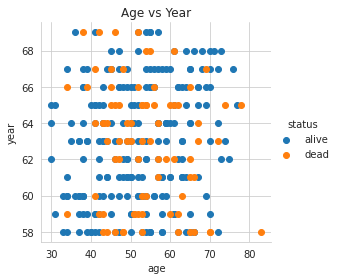

In [39]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4).set(title=("Age vs Year")) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();


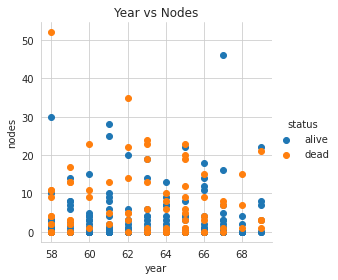

In [40]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4).set(title=("Year vs Nodes")) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();


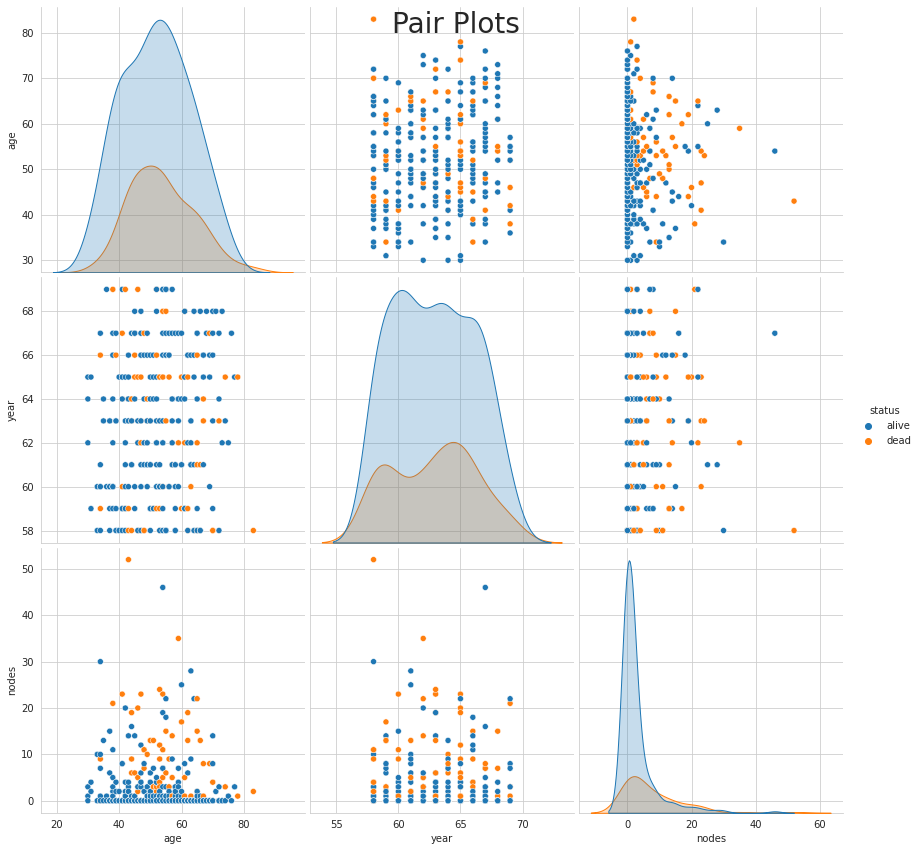

In [46]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size = 4);
plt.suptitle('Pair Plots', 
             size = 28);
plt.show()



* Age and Year are showing nearly same distribution between classes
* There is no linear separation of data in any of the chart
* Age vs node chart is most important for data analysis





# **Final Conclusions**



1. Data is highly concetrated at nodes = 0
2. Age is varying from 30 to 83
3. Year is varying frm 58 to 69
4. Nodes are varying from 0 to 52
5. Age and year are showing nearly same distribution between two classes
6. Node has different distribution between both the classes.
7. Node is significant feature in determining if patient survives
8. Patients with age between 30-35 are more likely to survive followed by patients between age 35-40
9. Highest number of patients died between age 48 to 54
Patients between age 54 to 58 have some chance of survival
10. Patients with < 2 nodes are more likely to survive
11. There are very less patients with more than 25 nodes
12. Some patients with nodes between 10 to 25 survived
13. The patients who got operated between year 63 to 66 have less chance of surival
14. Patients between age 35 to 38 and 51 to 60 survided in absence of nodes
15. Patients between age 50 to 70 with nodes more than 10 are less likely to survive

